# 01 

In [37]:
#Import Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy

In [38]:
path = r'C:\Users\Riley\Desktop\Data Any\A6'

In [39]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Airlines_Cleaned.csv'), index_col = False)

# 02

In [40]:
df.head()

,ID,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,0,CO,269,SFO,IAH,3,15,205,1
1,1,US,1558,PHX,CLT,3,15,222,1
2,2,AA,2400,LAX,DFW,3,20,165,1
3,3,AA,2466,SFO,DFW,3,20,195,1
4,4,AS,108,ANC,SEA,3,30,202,0


In [41]:
df.corr()

,ID,Flight,DayOfWeek,Time,Length,Delay
ID,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


In [49]:
sub = df[['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']]

In [50]:
sub

,Flight,DayOfWeek,Time,Length,Delay
0,269,3,15,205,1
1,1558,3,15,222,1
2,2400,3,20,165,1
3,2466,3,20,195,1
4,108,3,30,202,0
...,...,...,...,...,...
539378,178,5,1439,326,0
539379,398,5,1439,305,0
539380,609,5,1439,255,0
539381,78,5,1439,313,1


# 03

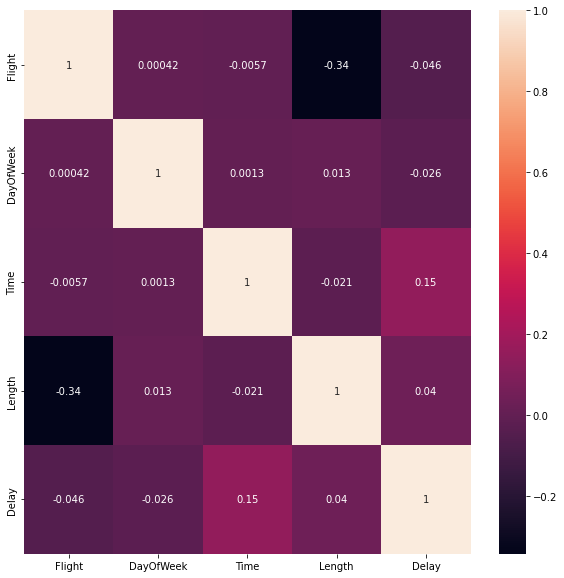

In [51]:
# Create a subplot and heatmap
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

3. There looks to be a number of very weak positive and negative correlations present to the point of being almost random. The two outliers being Length/Flight which has a weak negative correlation and Time/Delay has a weak postive, but these are still very weak correlations. 

# 04

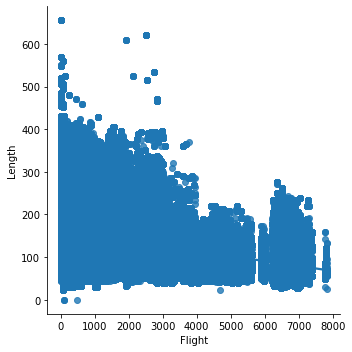

In [56]:
# Create Scatterplot
sns.lmplot(x = 'Flight', y = 'Length', data = df)

4. As expected with a weak correclation, the points are all over the place only kind of following the the line with many points being far from it.

# 05

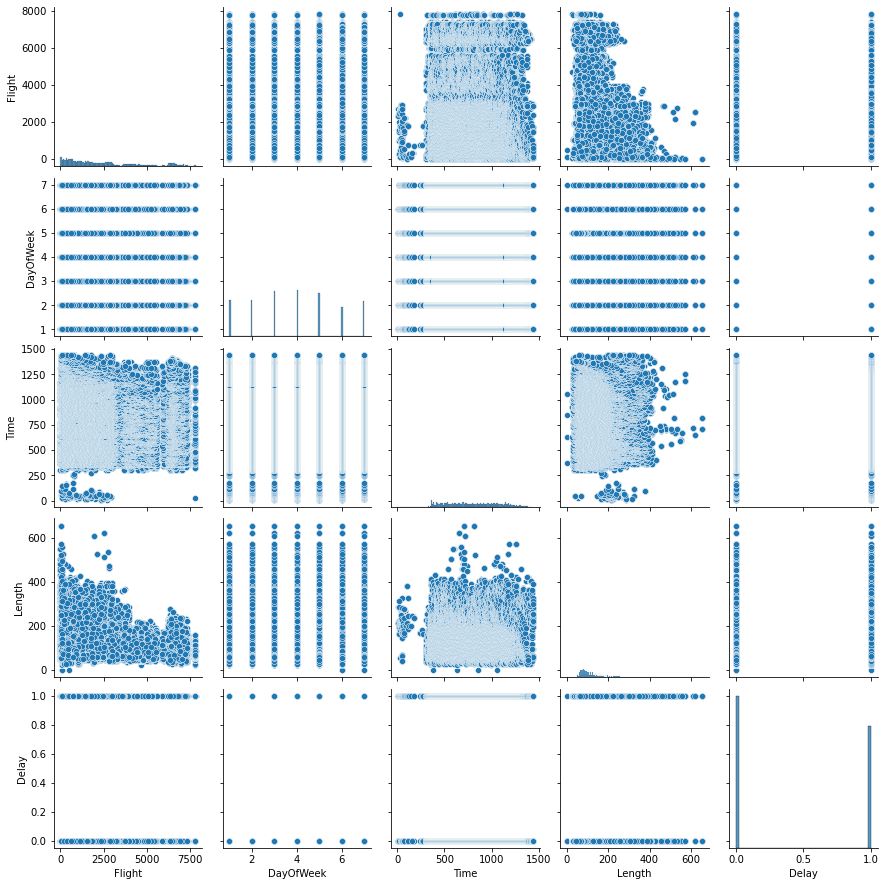

In [54]:
# Create a Pair Plot
g = sns.pairplot(sub)

5. I'm seeing some interesting  results under Time/Delays and Time/DayOfWeek with the points being so spaced out. I think further exploration will definitely neccesary to extract more meaningful insights.

# 06

<AxesSubplot:xlabel='Delay', ylabel='Count'>

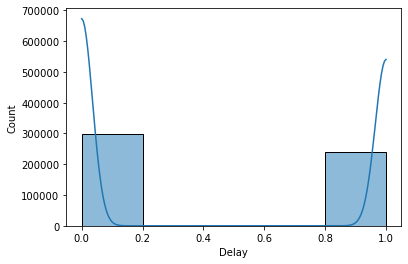

In [58]:
sns.histplot(df['Delay'], bins = 5, kde = True)

In [61]:
# Create a categroical variable to seperate Delayed and On Time
df.loc[df['Delay'] <= 0, 'Delay Status'] = 'On-Time'

In [62]:
df.loc[df['Delay'] >= 1, 'Delay Status'] = 'Delayed'

In [63]:
df['Delay Status'].value_counts(dropna = False)

On-Time    299119
Delayed    240264
Name: Delay Status, dtype: int64

<AxesSubplot:xlabel='Delay', ylabel='Time'>

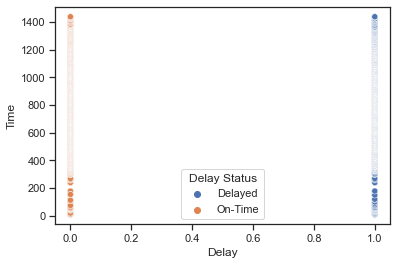

In [68]:
sns.set(style="ticks")
sns.scatterplot(x = 'Delay', y = 'Time', hue = 'Delay Status', data = df)

Interesting results as multiple categories seem to have this gap between the top and bottom of the chart with most of the points focused around the Min and Max. Does this mean most delays happen ealry and late in the day?

# 07

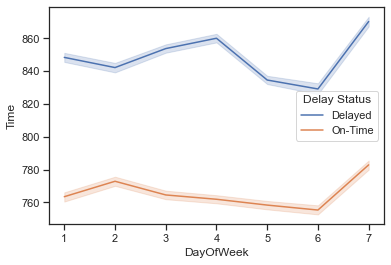

In [71]:
# Create line charts for intital questions
line = sns.lineplot(data = df, hue = 'Delay Status', x = 'DayOfWeek',y = 'Time')

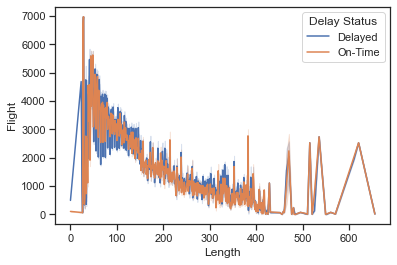

In [77]:
line = sns.lineplot(data = df, hue = 'Delay Status', x = 'Length',y = 'Flight')

<AxesSubplot:xlabel='Time', ylabel='Length'>

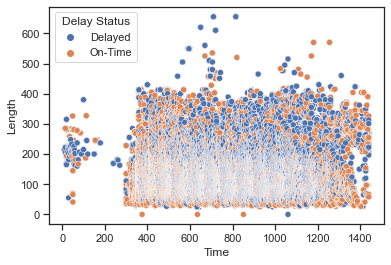

In [82]:
sns.scatterplot(x = 'Time', y = 'Length', hue = 'Delay Status', data = df)

<AxesSubplot:xlabel='Time', ylabel='Flight'>

C:\Users\Riley\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


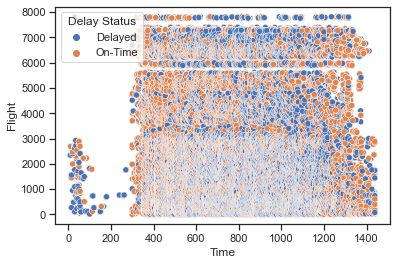

In [83]:
sns.scatterplot(x = 'Time', y = 'Flight', hue = 'Delay Status', data = df)

Some interesting results when the hue of the delay status is factored in. We have some strange outliers and groupings of delays in both the Flight/Time and Time/Length that I want to look into. The lack of numerical representation for the type of airline and airport are pretty limiting when looking for trends as well and I think I'll have better luck in Excel with portions of this analysis. Most of my comparisons have been overlapping to an almost extreme degree, but I think the outliers like the grouping around shorter/earlier flights shown above could be intersting to look into further.

More Questions after this analysis:
-Does the type of aircarft effect delays?
-Does the Time taken have any effect on Delays?

Hypothesis:
-Earliest/Latest flights have a higher rate of delays
-The middle and end of the week have a higher rate of delays
-Shorter Flights have a higher rate of delays


In [84]:
#Export New CSV
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'Airlines_Cleaned_2.csv'))